# Predicting Cancellations for Future Reservations

This notebooks makes use of the `generate_hotel_dfs` and `model_cancellations` functions found in `utils.py`.

In [3]:
from dbds import generate_hotel_dfs
from model_cancellations import predict_cancellations, model_cancellations
import pandas as pd
import numpy as np

In [4]:
pd.options.display.max_rows = 60
pd.options.display.max_columns = 70

In [5]:
# h1_res, h1_dbd = generate_hotel_dfs("../data/H1.csv")
# h2_res, h2_dbd = generate_hotel_dfs("../data/H2.csv")

In [6]:
# h1_res.to_pickle("pickle/h1_res.pick")
# h1_dbd.to_pickle("pickle/h1_dbd.pick")
# h2_res.to_pickle("pickle/h2_res.pick")
# h2_dbd.to_pickle("pickle/h2_dbd.pick")

In [7]:
h1_res = pd.read_pickle("pickle/h1_res.pick")
h2_res = pd.read_pickle("pickle/h2_res.pick")
h1_dbd = pd.read_pickle("pickle/h1_dbd.pick")
h2_dbd = pd.read_pickle("pickle/h2_dbd.pick")

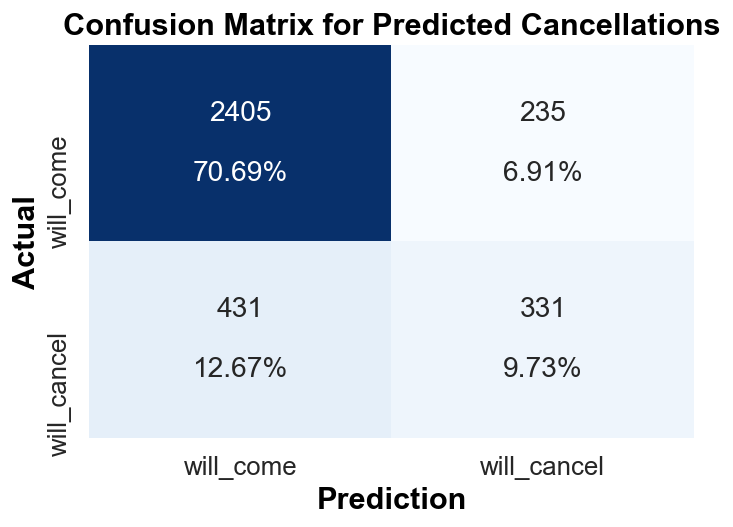

Optimal probability threshold (to maximize F-1): 0.37
F-1 Score: 0.498



In [10]:
h1_futures = predict_cancellations(h1_res, "2016-10-01", 1)

In [ ]:
h1_futures.shape

In [ ]:
h1_futures.will_cancel.value_counts()

In [ ]:
h1_res.IsCanceled.value_counts()

In [ ]:
h1_futures.sort_index()

In [ ]:
h2_futures = predict_cancellations(h2_res, "2017-08-01", 2)

In [ ]:
h2_futures.will_cancel.value_counts()

In [ ]:
from xgboost import XGBClassifier
X1_test, y_test, h1_model = model_cancellations(h1_res, "2017-08-01", 1)

In [ ]:
X1_test_preds = h1_model.predict_proba(X1_test)

In [ ]:
X1_test_preds.shape

In [ ]:
X1_test.shape

In [ ]:
X1_test_preds[:1]

In [ ]:
X1_test[["will_come", "will_cancel"]] = X1_test_preds

In [ ]:
X1_test.head(2)

In [ ]:
h1_futures.shape

In [ ]:
h2_futures = predict_cancellations(h2_res, "2017-08-01", 2)


In [ ]:
h2_futures.head(3)

In [ ]:
h2_futures.will_cancel.value_counts()

In [ ]:
h1_futures.to_pickle("pickle/h1_future_res.pick")
h2_futures.to_pickle("pickle/h2_future_res.pick")

In [ ]:
h1_dbd.RoomsSold.max()

In [ ]:
h2_dbd.RoomsSold.max()